In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.metrics import precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv(path_train)
df_train = df_train.drop_duplicates()
df_train.drop(['citric acid', 'density', 'sulphates'], axis = 1, inplace = True)
df_train['free sulfur dioxide'] = df_train['free sulfur dioxide'].apply(lambda x : x/1000)
df_train['total sulfur dioxide'] = df_train['total sulfur dioxide'].apply(lambda x : x/1000)
df_train['quality'] = np.where(df_train['quality'] >= 7, 1, 0)

In [6]:
df_test = pd.read_csv(path_test)

df_test.drop(['citric acid', 'density', 'sulphates'], axis = 1, inplace = True)
df_test['free sulfur dioxide'] = df_test['free sulfur dioxide'].apply(lambda x : x/1000)
df_test['total sulfur dioxide'] = df_test['total sulfur dioxide'].apply(lambda x : x/1000)

In [7]:
# Блок(и) обучения и поверки модели

In [8]:
X_train, y_train = df_train.drop(['quality'], axis = 1), df_train['quality']

model_1 = Pipeline([
    ('preprocessing', RobustScaler()),
    ('clf', LogisticRegression(C = 0.0119, penalty = 'l1', solver = 'saga', max_iter = 100))
])
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('clf',
                 LogisticRegression(C=0.0119, penalty='l1', solver='saga'))])

In [9]:
# Блок предсказания с использованием тестового набора

In [10]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = model_1.predict(df_test)

In [11]:
y_predict 

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

0.7076923076923077

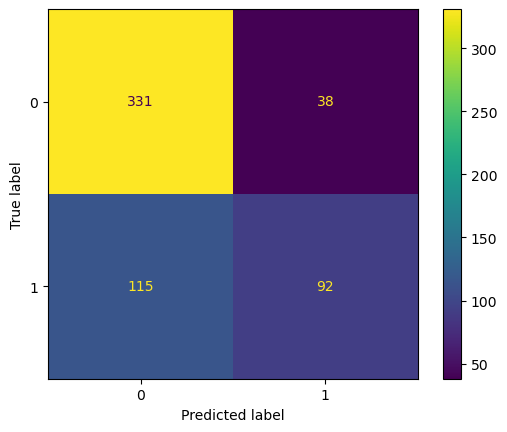

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)